In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle, os
from matplotlib.animation import ArtistAnimation

In [3]:
with open('combined_st_objects.pkl', 'rb') as f:
    fileObject = pickle.load(f)

In [4]:
st_objects = fileObject
st_objects_flatten = np.array(st_objects).flatten() # no distinct stimuli
unique_objects = np.unique(np.concatenate([list(d.keys()) for d in st_objects_flatten]))
n_unique_objects = len(unique_objects)
n_frames = len(st_objects[0])*len(st_objects)
object_index = dict(zip(unique_objects, range(n_unique_objects)))

In [6]:
objects_barcode = np.zeros((n_unique_objects, n_frames), dtype=bool)
for frame, d in enumerate(st_objects_flatten):
    for object in d:
        objects_barcode[object_index[object], frame] = True

In [7]:
import json
recurrences = objects_barcode.sum(1)
data = {}
data['objects'] = []  
for i in unique_objects:
#    data['objects'].append({'name': i, 'amount': recurrences[i]})
     data['objects'].append({'name': i})

with open('data.txt', 'w') as outfile:  
    json.dump(data, outfile)

with open('data.txt') as json_file:  
    data = json.load(json_file)

In [8]:
# no threshold
n_objects_by_frame = np.array([len(d) for d in st_objects_flatten])

In [9]:
# threshold
n_objects_by_frame_above_threshold = []
for i in range(len(st_objects_flatten)):
    temp = n_objects_by_frame_above_threshold
    temp_dict = list(st_objects_flatten[i].values())
    curr = np.array([sum(float(num) >= 0.5 for num in temp_dict)])
    n_objects_by_frame_above_threshold = np.hstack((temp, curr))
n_objects_by_frame_above_threshold = n_objects_by_frame_above_threshold.astype(int)

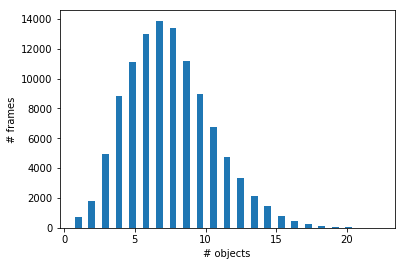

fraction frames with no objects (no threshold): 0.000000
fraction frames with no objects (above threshold): 0.581176


In [10]:
# for obj in tqdm(n_objects_by_frame):
plt.hist(n_objects_by_frame, bins=n_objects_by_frame.max(), align='left', rwidth=0.5)
plt.xlabel('# objects')
plt.ylabel('# frames')
plt.show()
print('fraction frames with no objects (no threshold): %f' % (n_objects_by_frame == 0).mean())
print('fraction frames with no objects (above threshold): %f' % (n_objects_by_frame_above_threshold == 0).mean())

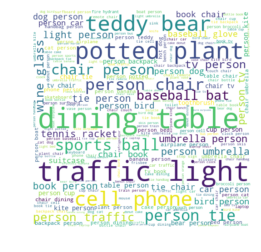

In [11]:
from wordcloud import WordCloud
text = ""
# returns a list of non-unique objects
for i in range(len(st_objects_flatten)): 
    temp_dict = list(st_objects_flatten[i].keys())
    for j in range(len(temp_dict)):
        text += temp_dict[j] + ' '
wordcloud = WordCloud(width=480, height=480, background_color="white", margin=0).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [12]:
def downsample(arr):
    x = np.array([x.mean() for x in np.split(arr, len(arr)/15)])
    x -= x.mean()
    x /= x.std()
    return x

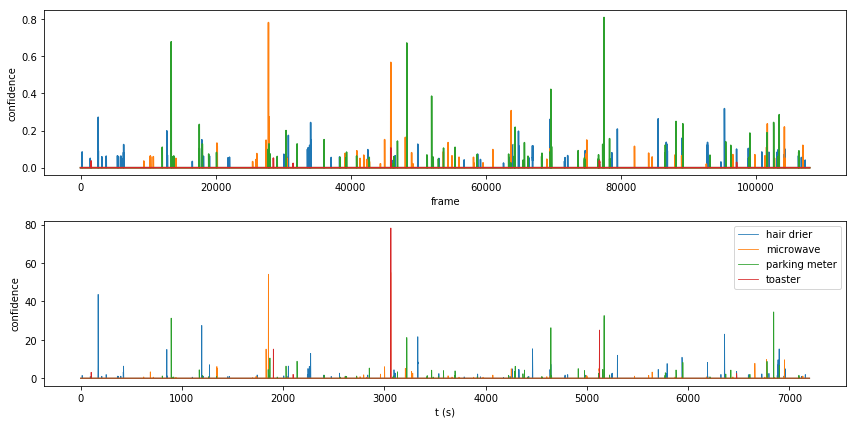

In [13]:
# incomplete
fig, ax = plt.subplots(2,1, figsize=(12, 6))

# st_objects_flatten_split = st_objects_flatten[:8100]
for i,j in enumerate(unique_objects):
    person_confidence = np.array([d[j] if j in d.keys() else 0 for d in st_objects_flatten])
    person_confidence_downsampled = downsample(person_confidence)
    if objects_barcode.sum(1)[i] <= 1000:
        ax[0].plot(person_confidence, label=j)
        line = ax[1].plot(person_confidence_downsampled, label=j)
        plt.setp(line, linewidth=0.8)
    
for a in ax:
    a.set_ylabel('confidence')
ax[0].set_xlabel('frame')
ax[1].set_xlabel('t (s)')
plt.tight_layout()
plt.legend()
plt.show()

c:\users\youngasc\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


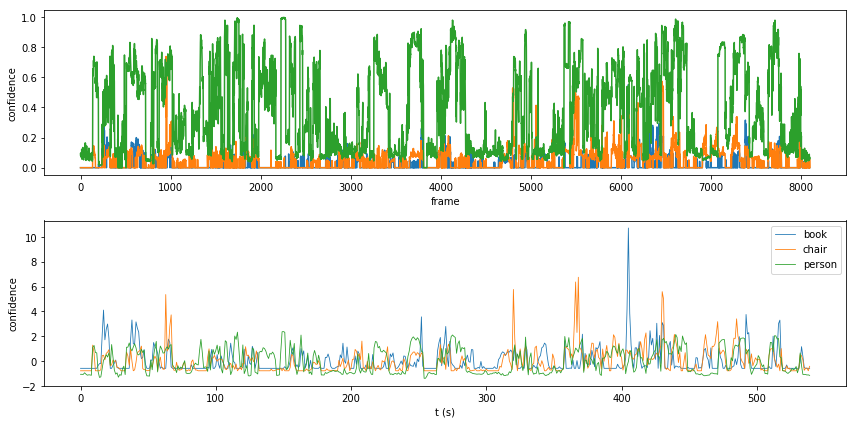

In [14]:
# incomplete
fig, ax = plt.subplots(2,1, figsize=(12, 6))

st_objects_flatten_split = st_objects_flatten[:8100]
for i,j in enumerate(unique_objects):
    person_confidence = np.array([d[j] if j in d.keys() else 0 for d in st_objects_flatten_split])
    person_confidence_downsampled = downsample(person_confidence)
    if objects_barcode.sum(1)[i] >= 30000:
        ax[0].plot(person_confidence, label=j)
        line = ax[1].plot(person_confidence_downsampled, label=j)
        plt.setp(line, linewidth=0.8)
    
for a in ax:
    a.set_ylabel('confidence')
ax[0].set_xlabel('frame')
ax[1].set_xlabel('t (s)')
plt.tight_layout()
plt.legend()
plt.show()

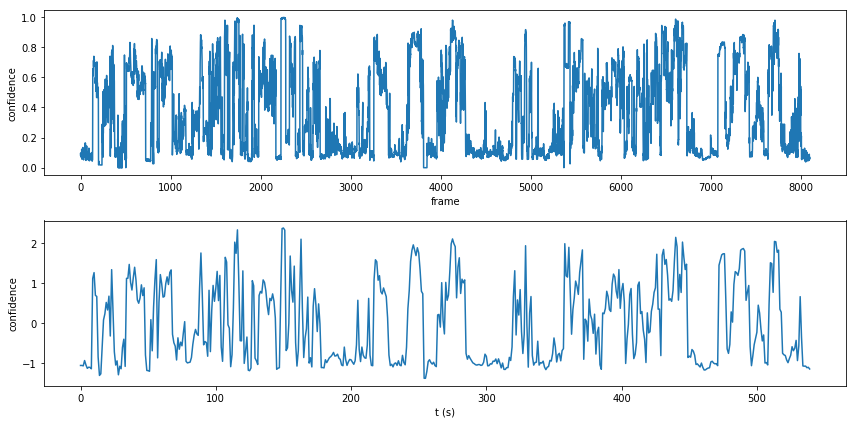

In [15]:
fig, ax = plt.subplots(2,1, figsize=(12, 6))

# st_objects_flatten_split = st_objects_flatten[:int(len(st_objects_flatten)/4)]
st_objects_flatten_split = st_objects_flatten[:8100]
i = 'person'
person_confidence = np.array([d[i] if i in d.keys() else 0 for d in st_objects_flatten_split])
person_confidence_downsampled = downsample(person_confidence)
ax[0].plot(person_confidence)
ax[1].plot(person_confidence_downsampled)

for a in ax:
    a.set_ylabel('confidence')
ax[0].set_xlabel('frame')
ax[1].set_xlabel('t (s)')
plt.tight_layout()
plt.show()

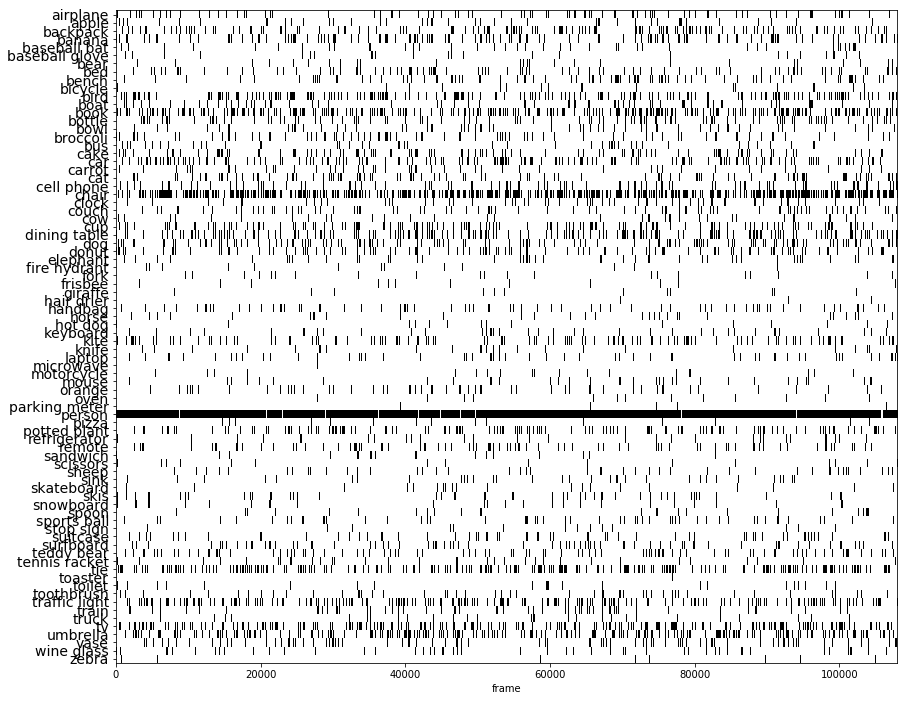

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(14,12))
ax.imshow(objects_barcode, aspect='auto', cmap=plt.get_cmap('Greys'))
ax.set_yticks(range(n_unique_objects))
ax.set_yticklabels(unique_objects, fontsize=14)
ax.set_xlabel('frame')
plt.show()

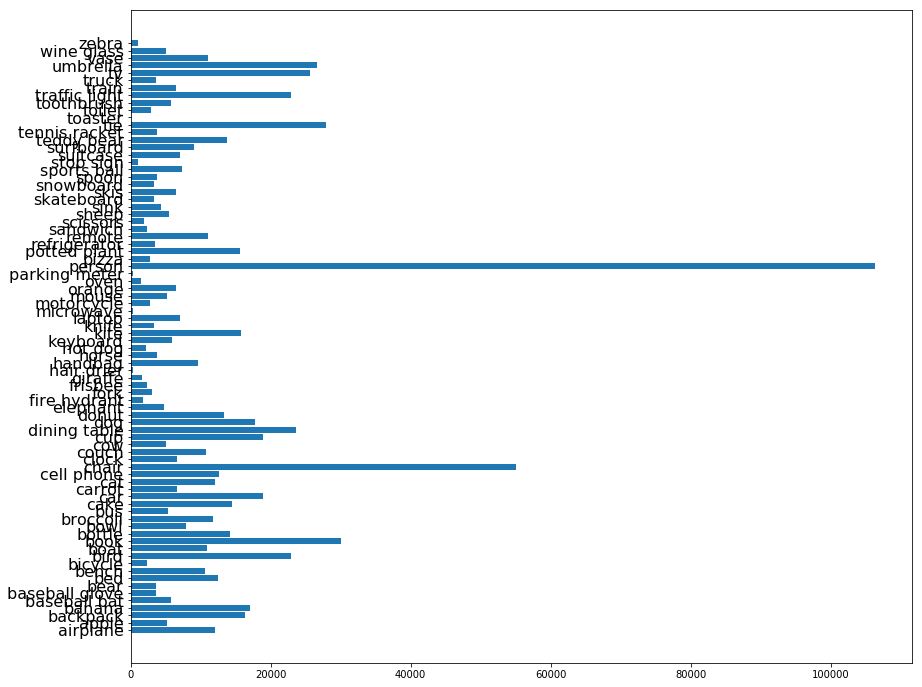

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(14,12))
ax.barh(range(n_unique_objects), objects_barcode.sum(1))
ax.set_yticks(range(n_unique_objects))
ax.set_yticklabels(unique_objects, fontsize=16)
plt.show()

In [ ]:
if not os.path.exists('sv_words.mp4'):
    sv = np.load('sv.npy')

    fig = plt.figure(figsize=(8,8))
    ax = plt.gca()
    ax.axis('off')

    artists = [[ax.imshow(sv[frame], aspect='equal')] 
               + [ax.text(64, 64, unique_objects[objects_barcode[:, frame]], ha='center', fontsize=24, color='r')] for frame in range(n_frames)]
    anim = ArtistAnimation(fig, artists, interval=1000./15.)
    anim.save('sv_.mp4')

In [10]:
from IPython.core.display import display, HTML
display(HTML('<video controls><source src="sv.mp4" type="video/mp4"></video>'))